In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
#import files
machines = pd.read_csv('PdM_machines.csv')
errors = pd.read_csv('PdM_errors.csv')
failures = pd.read_csv('PdM_failures.csv')
maintenances = pd.read_csv('PdM_maint.csv')

##  Machines

In [88]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [89]:
machines.shape

(100, 3)

In [90]:
machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [91]:
machines['model'].value_counts()

model
model3    35
model4    32
model2    17
model1    16
Name: count, dtype: int64

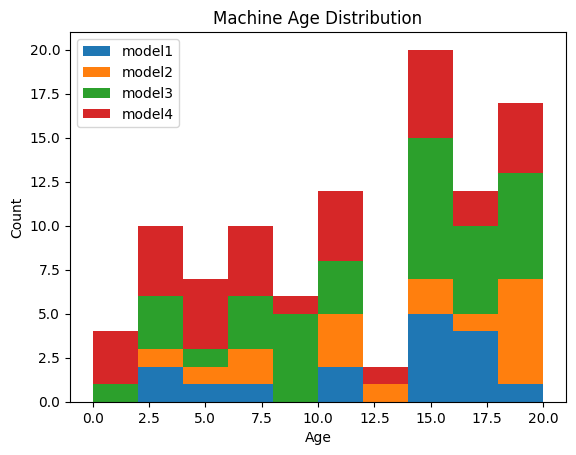

In [92]:
model1_data = machines.loc[machines['model'] == 'model1', 'age']
model2_data = machines.loc[machines['model'] == 'model2', 'age']
model3_data = machines.loc[machines['model'] == 'model3', 'age']
model4_data = machines.loc[machines['model'] == 'model4', 'age']

plt.hist([model1_data, model2_data, model3_data, model4_data], stacked=True, label=['model1', 'model2', 'model3', 'model4'])

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Machine Age Distribution')
plt.legend()

plt.show()

## Errors

In [93]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [94]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [95]:
errors.shape

(3919, 3)

<Axes: xlabel='errorID', ylabel='count'>

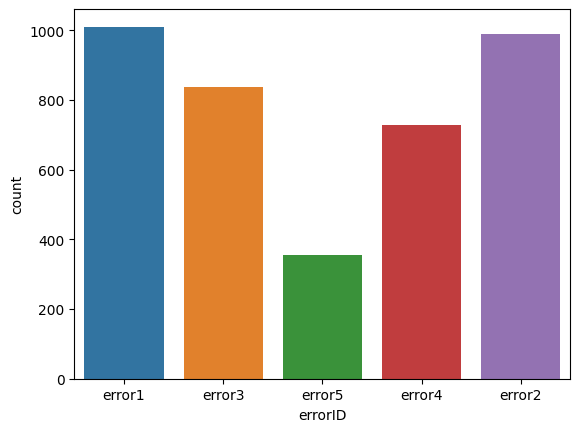

In [96]:
sns.countplot(x='errorID', data=errors, hue='errorID', legend=False)

In [97]:
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")

In [98]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3919 non-null   datetime64[ns]
 1   machineID  3919 non-null   int64         
 2   errorID    3919 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 92.0+ KB


## Failures

In [99]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


<Axes: xlabel='failure', ylabel='count'>

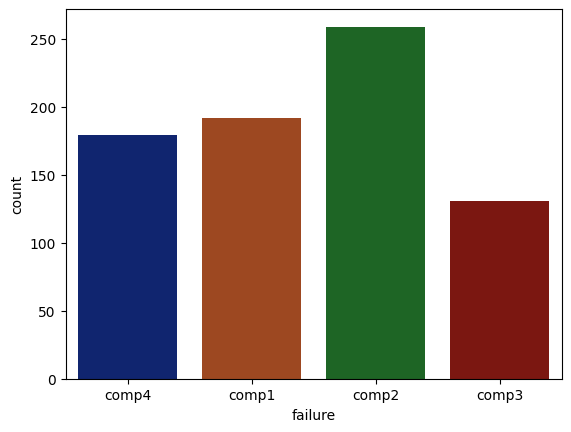

In [100]:
sns.countplot(x='failure', data=failures, hue='failure', palette='dark', legend=False)

In [101]:
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")

In [102]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   761 non-null    datetime64[ns]
 1   machineID  761 non-null    int64         
 2   failure    761 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.0+ KB


## Maintenances

In [103]:
maintenances['datetime'] = pd.to_datetime(maintenances['datetime'], format="%Y-%m-%d %H:%M:%S")
maintenances['comp'] = maintenances['comp'].astype('object')
maintenances.shape

(3286, 3)

In [104]:
maintenances.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


<Axes: xlabel='comp', ylabel='count'>

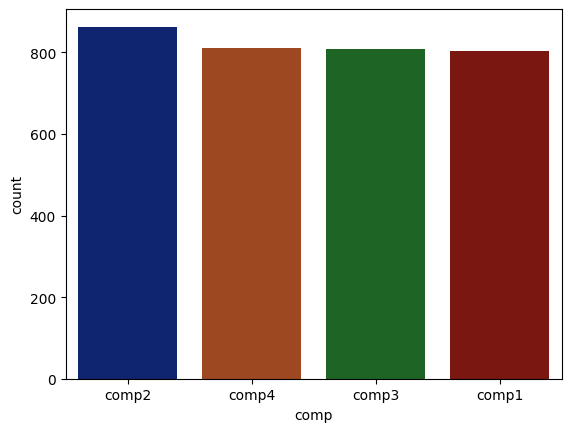

In [105]:
sns.countplot(x='comp', data=maintenances, hue='comp', palette='dark', legend=False)

## Telemetry/ Sensor Data

In [106]:
telemetry = pd.read_csv('PdM_telemetry.csv')
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [107]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

In [108]:
telemetry

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


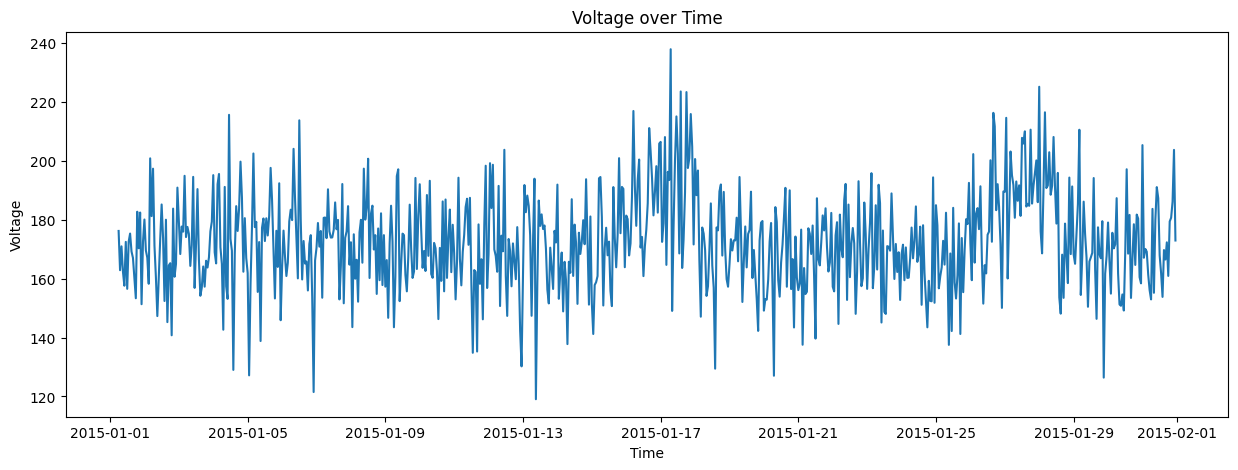

In [109]:
# Exploring voltage fluctuation using line graph (of 1 month)
filtered_df = telemetry.loc[
    (telemetry['machineID'] == 1) & 
    (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
    (telemetry['datetime'] < pd.to_datetime('2015-02-01')), 
    ['datetime', 'volt']
]

plt.figure(figsize=(15, 5))
plt.plot(filtered_df['datetime'], filtered_df['volt']) # Line Graph
plt.title('Voltage over Time')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.show()

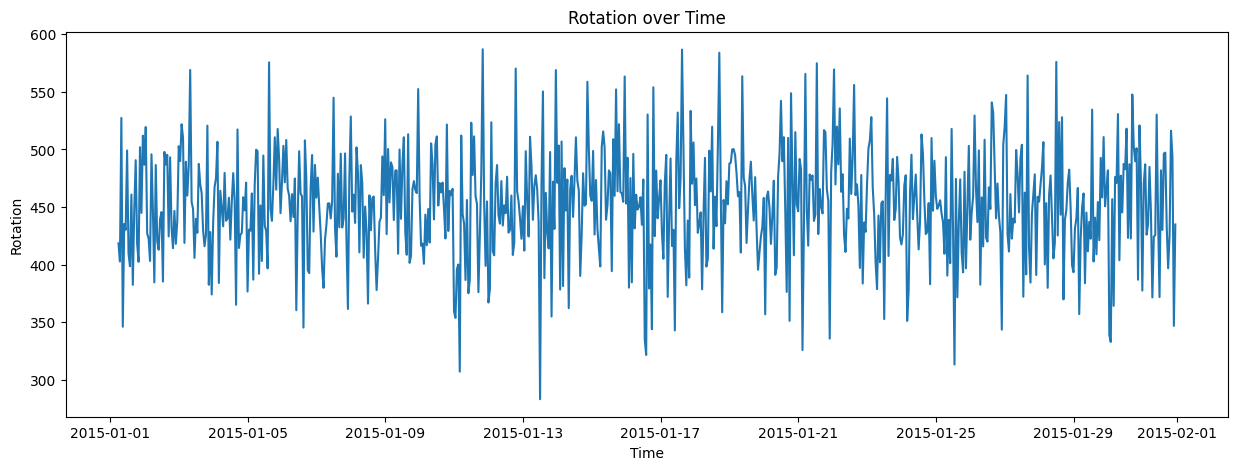

In [110]:
# Exploring rotate fluctuation using line graph (of 1 month)
filtered_df = telemetry.loc[
    (telemetry['machineID'] == 1) & 
    (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
    (telemetry['datetime'] < pd.to_datetime('2015-02-01')), 
    ['datetime', 'rotate']
]

plt.figure(figsize=(15, 5))
plt.plot(filtered_df['datetime'], filtered_df['rotate'])
plt.title('Rotation over Time')
plt.xlabel('Time')
plt.ylabel('Rotation')
plt.show()

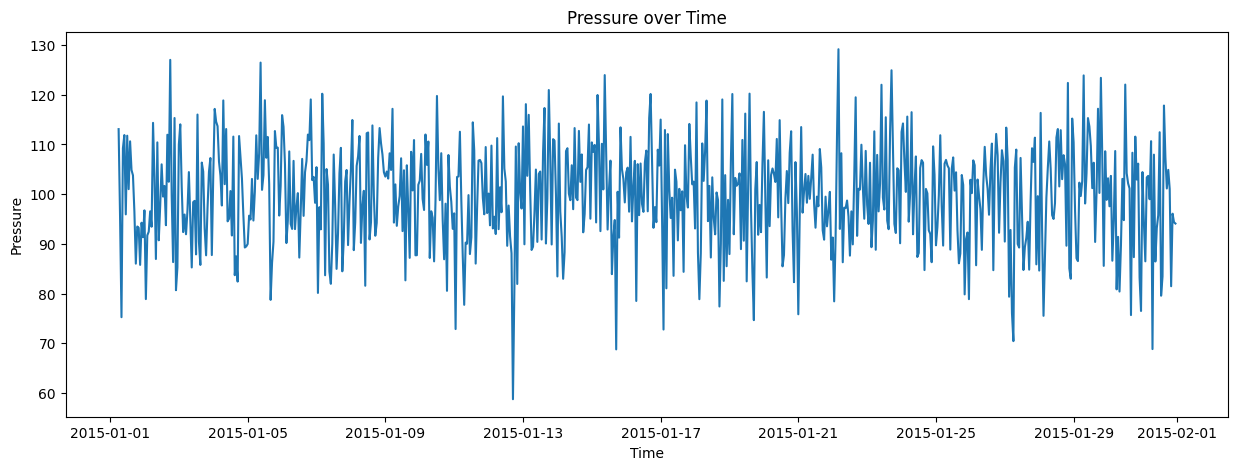

In [111]:
# Exploring voltage pressure using line graph (of 1 month)
filtered_df = telemetry.loc[
    (telemetry['machineID'] == 1) & 
    (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
    (telemetry['datetime'] < pd.to_datetime('2015-02-01')), 
    ['datetime', 'pressure']
]

plt.figure(figsize=(15, 5))
plt.plot(filtered_df['datetime'], filtered_df['pressure'])
plt.title('Pressure over Time')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.show()

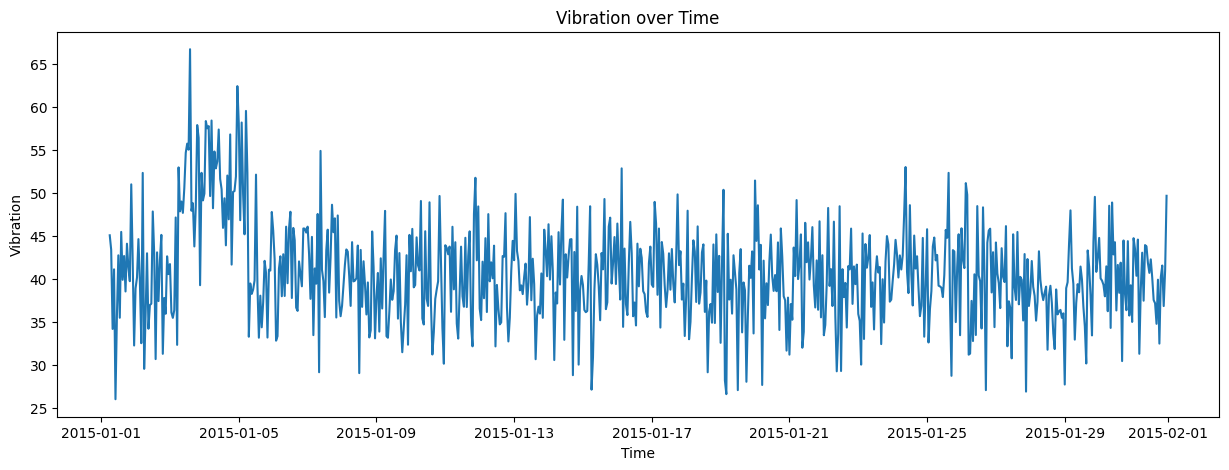

In [112]:
# Exploring vibration fluctuation using line graph (of 1 month)
filtered_df = telemetry.loc[
    (telemetry['machineID'] == 1) & 
    (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
    (telemetry['datetime'] < pd.to_datetime('2015-02-01')), 
    ['datetime', 'vibration']
]

plt.figure(figsize=(15, 5))
plt.plot(filtered_df['datetime'], filtered_df['vibration'])
plt.title('Vibration over Time')
plt.xlabel('Time')
plt.ylabel('Vibration')
plt.show()

## Creation of FinalDataset

In [113]:
maint_pivot = maintenances.groupby(["machineID", "datetime"])['comp'].value_counts().unstack().fillna(0)
maint_pivot.columns = ['maint_' + col for col in maint_pivot.columns]

telemetry_maint = telemetry.merge(maint_pivot, on=["datetime", "machineID"], how="left").fillna(0)

error_pivot = errors.groupby(["machineID", "datetime"])['errorID'].value_counts().unstack().fillna(0)

tel_maint_error = telemetry_maint.merge(error_pivot, on=["datetime", "machineID"], how="left").fillna(0)

fail_pivot = failures.groupby(["machineID", "datetime"])['failure'].value_counts().unstack().fillna(0)
fail_pivot.columns = ['fail_' + col for col in fail_pivot.columns]

finalData = tel_maint_error.merge(fail_pivot, on=["datetime", "machineID"], how="left").fillna(0)

In [114]:
finalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   datetime     876100 non-null  datetime64[ns]
 1   machineID    876100 non-null  int64         
 2   volt         876100 non-null  float64       
 3   rotate       876100 non-null  float64       
 4   pressure     876100 non-null  float64       
 5   vibration    876100 non-null  float64       
 6   maint_comp1  876100 non-null  float64       
 7   maint_comp2  876100 non-null  float64       
 8   maint_comp3  876100 non-null  float64       
 9   maint_comp4  876100 non-null  float64       
 10  error1       876100 non-null  float64       
 11  error2       876100 non-null  float64       
 12  error3       876100 non-null  float64       
 13  error4       876100 non-null  float64       
 14  error5       876100 non-null  float64       
 15  fail_comp1   876100 non-null  floa

In [115]:
finalData.shape

(876100, 19)

In [116]:
finalData

,datetime,machineID,volt,rotate,pressure,vibration,maint_comp1,maint_comp2,maint_comp3,maint_comp4,error1,error2,error3,error4,error5,fail_comp1,fail_comp2,fail_comp3,fail_comp4
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
finalData.to_csv('FinalDataSet.csv', index=False)

## Final Output Data and Analysis

In [118]:
df = pd.read_csv('FinalDataSet.csv')
df.head()

,datetime,machineID,volt,rotate,pressure,vibration,maint_comp1,maint_comp2,maint_comp3,maint_comp4,error1,error2,error3,error4,error5,fail_comp1,fail_comp2,fail_comp3,fail_comp4
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
df['datetime'].value_counts()

datetime
2015-01-01 06:00:00    100
2015-09-01 17:00:00    100
2015-09-01 11:00:00    100
2015-09-01 12:00:00    100
2015-09-01 13:00:00    100
                      ... 
2015-05-02 17:00:00    100
2015-05-02 16:00:00    100
2015-05-02 15:00:00    100
2015-05-02 14:00:00    100
2016-01-01 06:00:00    100
Name: count, Length: 8761, dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     876100 non-null  object 
 1   machineID    876100 non-null  int64  
 2   volt         876100 non-null  float64
 3   rotate       876100 non-null  float64
 4   pressure     876100 non-null  float64
 5   vibration    876100 non-null  float64
 6   maint_comp1  876100 non-null  float64
 7   maint_comp2  876100 non-null  float64
 8   maint_comp3  876100 non-null  float64
 9   maint_comp4  876100 non-null  float64
 10  error1       876100 non-null  float64
 11  error2       876100 non-null  float64
 12  error3       876100 non-null  float64
 13  error4       876100 non-null  float64
 14  error5       876100 non-null  float64
 15  fail_comp1   876100 non-null  float64
 16  fail_comp2   876100 non-null  float64
 17  fail_comp3   876100 non-null  float64
 18  fail_comp4   876100 non-

In [121]:
df['datetime'] = pd.to_datetime(df['datetime'])

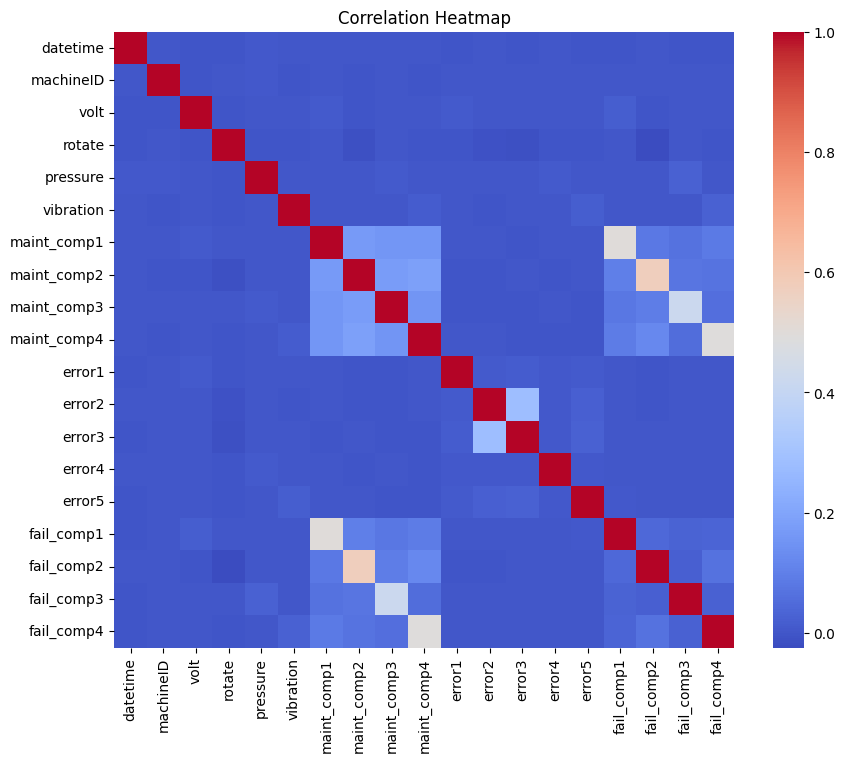

In [122]:
# Calculate pairwise correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

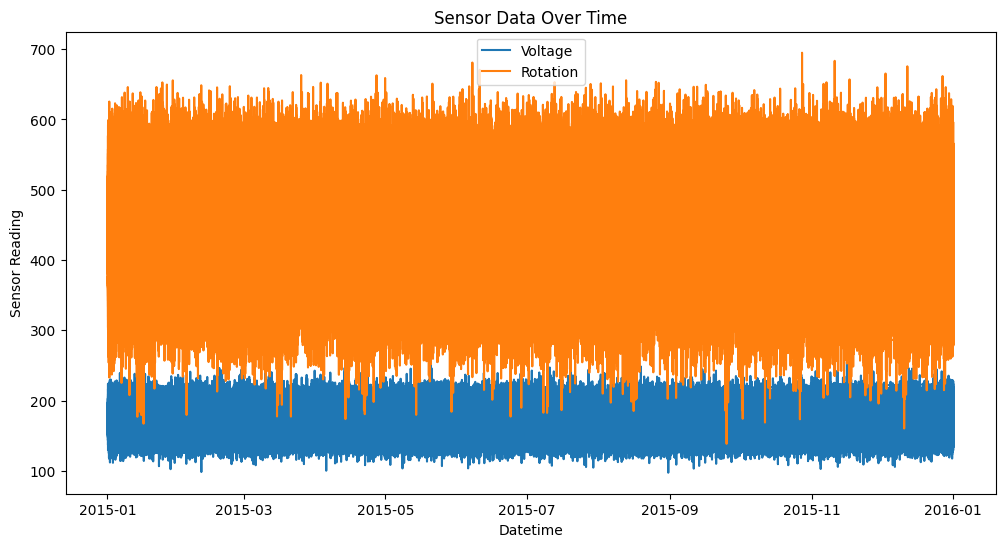

In [123]:
# Plot sensor data over time
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['volt'], label='Voltage')
plt.plot(df['datetime'], df['rotate'], label='Rotation')

plt.xlabel('Datetime')
plt.ylabel('Sensor Reading')
plt.title('Sensor Data Over Time')
plt.legend()
plt.show()

In [124]:
# Create a new feature by calculating the sum of all error columns
df['total_errors'] = df[['error1', 'error2', 'error3', 'error4', 'error5']].sum(axis=1)
df['total_errors']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
876095    0.0
876096    0.0
876097    0.0
876098    0.0
876099    0.0
Name: total_errors, Length: 876100, dtype: float64

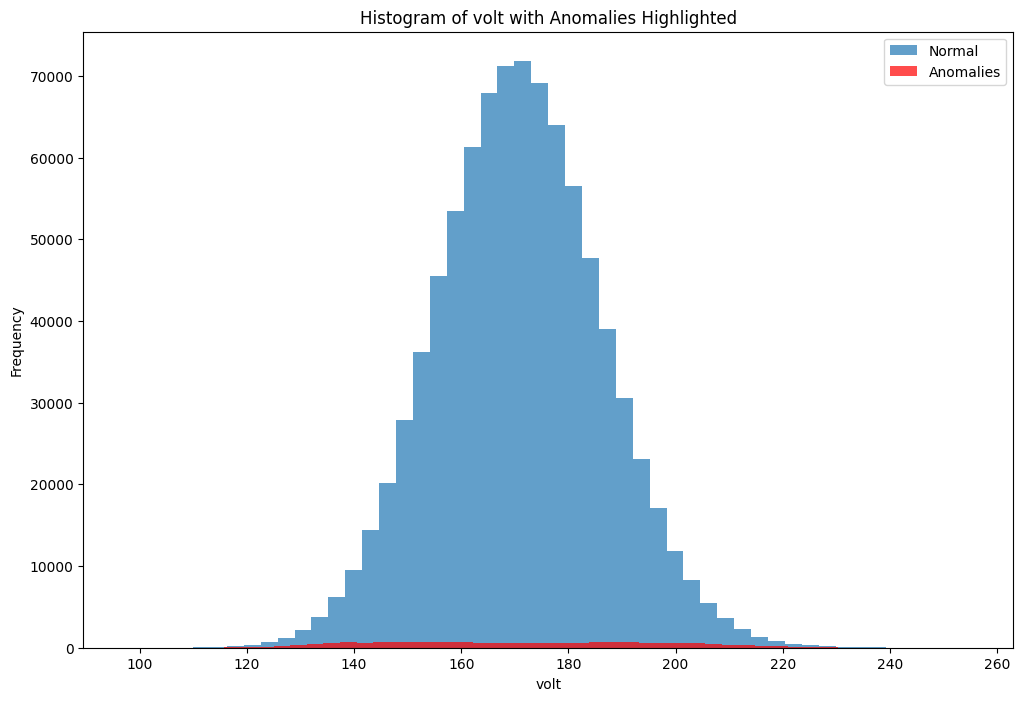

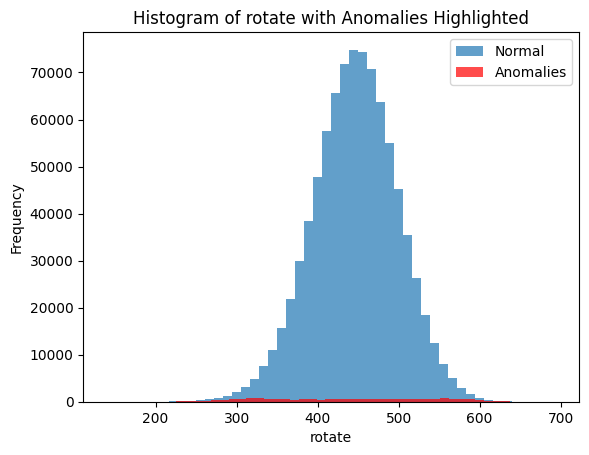

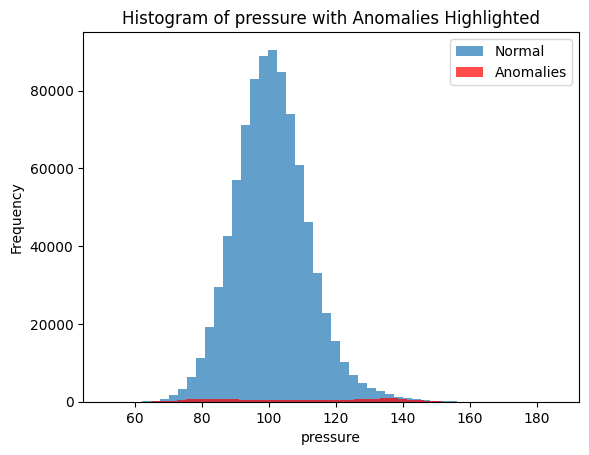

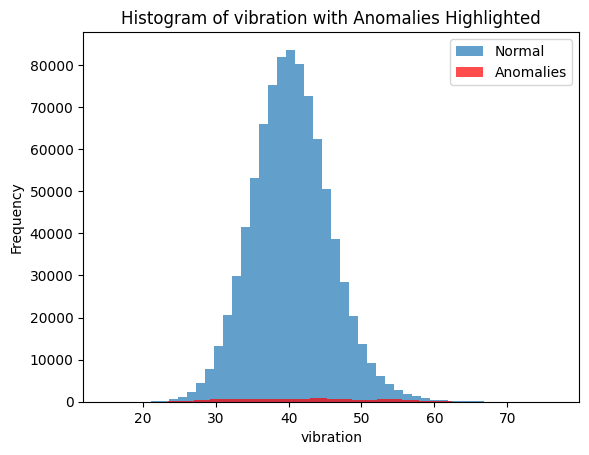

In [125]:
from sklearn.ensemble import IsolationForest
columns_to_plot = ['volt', 'rotate', 'pressure', 'vibration']

iso_forest = IsolationForest(contamination=0.02)  # Adjust contamination based on expected anomaly rate
iso_forest.fit(df[columns_to_plot])

# Predict anomalies
anomaly_labels = iso_forest.predict(df[columns_to_plot])
anomalies = df[anomaly_labels == -1]

# Now you can plot the histograms with anomalies highlighted
plt.figure(figsize=(12, 8))
for column in columns_to_plot:
    plt.hist(df[column], bins=50, alpha=0.7, label='Normal')
    plt.hist(anomalies[column], bins=50, color='red', alpha=0.7, label='Anomalies')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} with Anomalies Highlighted')
    plt.legend()
    plt.show()


## Model Training and Prediction

In [126]:
df.head()

,datetime,machineID,volt,rotate,pressure,vibration,maint_comp1,maint_comp2,maint_comp3,maint_comp4,error1,error2,error3,error4,error5,fail_comp1,fail_comp2,fail_comp3,fail_comp4,total_errors
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score

X = df.drop(['machineID', 'datetime', 'maint_comp1'], axis=1).values
y = df['maint_comp1'].values

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

Epoch 1/10
9735/9735 - 25s - loss: 0.0139 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9994 - 25s/epoch - 3ms/step
Epoch 2/10
9735/9735 - 22s - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9994 - 22s/epoch - 2ms/step
Epoch 3/10
9735/9735 - 25s - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9994 - 25s/epoch - 3ms/step
Epoch 4/10
9735/9735 - 22s - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9994 - 22s/epoch - 2ms/step
Epoch 5/10
9735/9735 - 22s - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9994 - 22s/epoch - 2ms/step
Epoch 6/10
9735/9735 - 21s - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9994 - 21s/epoch - 2ms/step
Epoch 7/10
9735/9735 - 26s - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9994 - 26s/epoch - 3ms/step
Epoch 8/10
9735/9735 - 23s - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9994 - 23s/epoch - 2

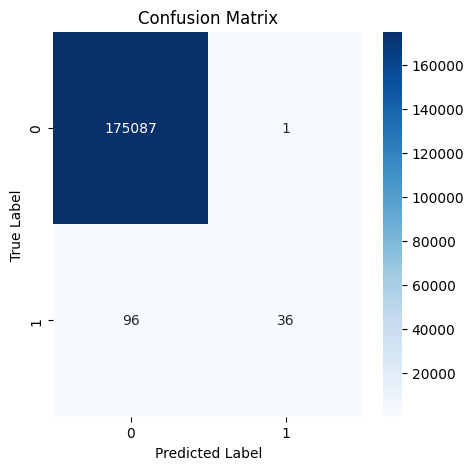

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()